# Phase 1

The first phase of the case study involves four sections – (1) dataset description, (2) data cleaning, (3) Exploratory Data Analysis, and (4) research question.

## Dataset Description

Each group should select one real-world dataset from the list of datasets provided for the project. Each dataset has a description file, which also contains a detailed description of each variable.

In this section of the notebook, you must fulfill the following:

- State a brief description of the dataset.
- Provide a description of the collection process executed to build the dataset.
- Discuss the implications of the data collection method on the generated conclusions and insights.
- Note that you may need to look at relevant sources related to the dataset to acquire necessary information for this part of the project.
- Describe the structure of the dataset file.
  - What does each row and column represent?
  - How many observations are there in the dataset?
  - How many variables are there in the dataset?
  - If the dataset is composed of different files that you will combine in the succeeding steps, describe the structure and the contents of each file.
- Discuss the variables in each dataset file. What does each variable represent? All variables, even those which are not used for the study, should be described to the reader. The purpose of each variable in the dataset should be clear to the reader of the notebook without having to go through an external link.


In [1]:
#IMPORTS

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


from scipy.stats import zscore
from scipy import stats
from scipy.stats import chi2_contingency


In [2]:
#LOAD SOF PUF 2015 FILE

file_path = 'SOF PUF 2015.csv'
data = pd.read_csv(file_path)


## Data Cleaning

For each used variable, check all the following and, if needed, perform data cleaning:

- There are multiple representations of the same categorical value.
- The datatype of the variable is incorrect.
- Some values are set to default values of the variable.
- There are missing data.
- There are duplicate data.
- The formatting of the values is inconsistent.

**Note**: No need to clean all variables. Clean only the variables utilized in the study.


# Exploratory Data Analysis

## Section 1: Understanding The Shape of the Data



This section involves getting a sense of our data's structure, dimensions and the types of variables we will be dealing with.

In [3]:
data.info()
data.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RREG            5440 non-null   int64  
 1   HHNUM           5440 non-null   int64  
 2   RRPL            5440 non-null   int64  
 3   RSTR            5440 non-null   int64  
 4   RPSU            5440 non-null   int64  
 5   RROTATION       5440 non-null   int64  
 6   RQ1_LNO         5440 non-null   int64  
 7   RQ2_REL         5440 non-null   int64  
 8   RQ3_SEX         5440 non-null   int64  
 9   RQ4_AGE         5440 non-null   int64  
 10  RQ5_TMSLEFT     5440 non-null   int64  
 11  RQ6M_DTLEFT     5440 non-null   int64  
 12  RQ6Y_DTLEFT     5440 non-null   int64  
 13  RQ7_MSTAT       5438 non-null   float64
 14  RQ8_HGRADE      5440 non-null   int64  
 15  RQ9_USOCC       5440 non-null   int64  
 16  RQ10_REASON     5440 non-null   int64  
 17  RQ11_BASE       5012 non-null   f

(5440, 48)

In [4]:
data.head()


,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND
0,1,1,1,21125,10,26,81,8,2,59,3,1,2015,3.0,4,131,6,NaN,500,18,1,513.0,24.0,2,NaN,NaN,NaN,7.0,2016.0,1,60000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,7500.0,483.3481,NaN
1,1,2,1,21125,10,26,3,3,1,29,1,7,2012,1.0,67,223,1,1.0,213,36,1,222.0,36.0,1,7.0,2015.0,2.0,NaN,NaN,1,15000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50000.0,1,8000.0,512.6429,1.0
2,1,2,1,21125,10,26,4,3,2,25,1,4,2012,2.0,67,223,1,1.0,233,24,1,223.0,24.0,1,4.0,2014.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60000.0,2,NaN,539.1801,2.0
3,1,2,1,21125,10,26,10,3,1,30,4,1,2015,1.0,68,512,1,1.0,234,12,1,512.0,40.0,2,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,8000.0,512.6429,1.0
4,1,3,1,21125,10,26,2,3,1,35,2,2,2011,2.0,4,721,2,1.0,214,36,1,826.0,45.0,1,12.0,2013.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,477.4089,2.0


In [5]:
#Descriptive statistics
data.describe()

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND
count,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5438.000000,5440.000000,5440.000000,5440.000000,5012.000000,5440.000000,5440.000000,5440.000000,5067.000000,5067.000000,5440.000000,1259.000000,1259.000000,1259.000000,4181.000000,4181.000000,5440.000000,4003.000000,4003.000000,3933.0,3933.000000,1079.0,1079.000000,1564.0,1564.000000,537.0,537.000000,48.0,48.000000,5440.000000,975.000000,5440.000000,814.000000,5440.000000,5362.000000
mean,13.708272,2306.230331,2.493750,21170.534559,7816.958088,26.991912,4.789890,2.826654,1.534559,36.579044,2.006250,6.490441,2013.888971,1.826958,33.764890,418.355699,1.325000,1.129689,261.915625,25.758824,1.068750,667.439708,27.718571,1.769853,6.953137,2014.277998,2.289118,12.792155,2515.804831,1.264154,63923.842618,2.882838,1.0,82.087211,2.0,30.851715,3.0,23.180946,4.0,10.988827,5.0,37.625000,1.820772,72803.774359,1.850368,18317.119165,541.305478,1.155166
std,13.852386,1335.172225,1.113836,3954.024062,5298.529355,1.000059,11.122881,1.543244,0.498850,10.760527,1.986616,3.493895,1.191758,0.814862,29.818956,331.584532,1.081306,0.335994,86.308339,19.175003,0.253052,257.988282,16.750183,0.433022,3.924186,1.023065,0.578332,21.483155,1784.555012,0.440922,67404.802457,1.940652,0.0,22.246624,0.0,22.054963,0.0,18.353321,0.0,12.115576,0.0,26.419388,0.383578,83715.812143,0.356743,17235.232200,194.143317,0.362097
min,1.000000,1.000000,1.000000,10001.000000,10.000000,26.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2010.000000,1.000000,0.000000,11.000000,1.000000,1.000000,100.000000,0.000000,1.000000,111.000000,0.000000,1.000000,1.000000,2010.000000,1.000000,1.000000,2015.000000,1.000000,1300.000000,1.000000,1.0,5.000000,2.0,1.000000,3.0,1.000000,4.0,1.000000,5.0,10.000000,1.000000,0.000000,1.000000,1000.000000,124.489100,1.000000
25%,3.000000,1137.750000,2.000000,21115.000000,2941.000000,26.000000,2.000000,2.000000,1.000000,28.000000,1.000000,4.000000,2013.000000,1.000000,4.000000,23.000000,1.000000,1.000000,222.000000,12.000000,1.000000,512.000000,13.000000,2.000000,5.000000,2014.000000,2.000000,4.000000,2016.000000,1.000000,28000.000000,1.000000,1.0,70.000000,2.0,15.000000,3.0,10.000000,4.0,5.000000,5.0,17.500000,2.000000,24000.000000,2.000000,7000.000000,415.825500,1.000000
50%,9.000000,2311.500000,2.000000,22111.000000,6843.000000,26.000000,3.000000,3.000000,2.000000,34.000000,2.000000,6.500000,2014.000000,2.000000,6.000000,421.000000,1.000000,1.000000,233.000000,24.000000,1.000000,724.000000,26.000000,2.000000,7.000000,2015.000000,2.000000,7.000000,2016.000000,1.000000,47000.000000,2.000000,1.0,90.000000,2.0,22.000000,3.0,20.000000,4.0,10.000000,5.0,30.000000,2.000000,50000.000000,2.000000,12000.000000,537.139100,1.000000
75%,14.000000,3460.250000,3.000000,23205.000000,13399.750000,28.000000,4.000000,3.000000,2.000000,43.000000,2.000000,9.000000,2015.000000,2.000000,65.000000,723.000000,1.000000,1.000000,234.000000,26.000000,1.000000,913.000000,41.000000,2.000000,9.000000,2015.000000,3.000000,11.000000,2017.000000,2.000000,77500.000000,5.000000,1.0,100.000000,2.0,45.000000,3.0,30.000000,4.0,10.000000,5.0,50.000000,2.000000,100000.000000,2.000000,25000.000000,655.102100,1.000000
max,42.000000,4579.000000,4.000000,29007.000000,16569.000000,28.000000,83.000000,11.000000,2.000000,86.000000,99.000000,99.000000,2015.000000,6.000000,90.000000,933.000000,8.000000,2.00000

## Section 2: Understanding Demographic Identities of the OFWs

#### Q1: What are the demographics (age, region, gender) and the highest educational attainment of OFWs?

This section analyzes the demographics of Overseas Filipino Workers (OFWs). Specifically, their age, region of origin, gender, and highest educational attainment. 

In [6]:
age_summary = data['RQ4_AGE'].describe()
age_summary_df = pd.DataFrame(age_summary)

age_summary_df.columns = ['Summary']
age_summary_df.index.name = 'Age'

age_summary_df['Summary'] = age_summary_df['Summary'].apply(lambda x: f"{float(x):.2f}" if '.' in str(x) else x)
print(age_summary_df)

       Summary
Age           
count  5440.00
mean     36.58
std      10.76
min       3.00
25%      28.00
50%      34.00
75%      43.00
max      86.00


The age distribution suggests that the majority of OFWs fall within the working-age range (roughly 28 to 43 years old), with the median being 34 years. The minimum age of 3 years is clearly an anomaly or data entry error. It's highly unlikely that an OFW would be as young as 3 years old. Since our focus is on the working-age population, we will consider setting a realistic age range for OFWs (18 to 65 years) to avoid distortions in the analysis.

In [10]:
gender_distribution = data['RQ3_SEX'].value_counts()
print("Gender distribution (1=Male, 2=Female):")
print(gender_distribution)

Gender distribution (1=Male, 2=Female):
RQ3_SEX
2    2908
1    2532
Name: count, dtype: int64


In [7]:
region_mapping = {
    13: "NCR",
    14: "CAR",
    1: "R I",
    2: "R II",
    3: "R III",
    41: "R IVA",
    42: "R IVB",
    5: "R V",
    6: "R VI",
    7: "R VII",
    8: "R VIII",
    9: "R IX",
    10: "R X",
    11: "R XI",
    12: "R XII",
    16: "R XIII",
    15: "R XIII"
}

data['Region_Name'] = data['RREG'].map(region_mapping)

In [42]:
region_counts = data['Region_Name'].value_counts()

print(f"Region Counts:\n{region_counts}\n")


Region Counts:
Region_Name
R IVA     930
R III     607
NCR       552
R I       538
R II      462
R VI      358
CAR       295
R VII     288
R XIII    272
R XII     240
R XI      181
R V       177
R VIII    175
R X       154
R IX      124
R IVB      87
Name: count, dtype: int64



This shows that Region IV-A CALABARZON has the highest representation of OFWs, Central Luzon and National Capital Region. The least represented regions include R IVB, R IX, and R X, suggesting fewer OFWs surveyed from these areas.

In [43]:
education_mapping = {
    0: 'No Grade Completed',
    1: 'Elementary Undergraduate',
    2: 'Elementary Graduate',
    3: 'Highschool Undergraduate',
    4: 'Highschool Graduate',
    5: 'Post-Secondary Non-Tertiary/Technical-Vocational Undergraduate',
    6: 'College Undergraduate',
    60: 'College Graduate',
    90: 'Post Baccalaureate',
    50: 'Post Secondary',
    99: 'Not Reported'
}

data['Educ_level'] = data['RQ8_HGRADE'].map(education_mapping)

In [44]:
education_counts = data['Educ_level'].value_counts()

print(f"Education Level Counts:\n{education_counts}\n")

Education Level Counts:
Educ_level
Highschool Graduate                                               1470
College Undergraduate                                              789
Highschool Undergraduate                                           220
Elementary Graduate                                                138
Elementary Undergraduate                                            64
Post-Secondary Non-Tertiary/Technical-Vocational Undergraduate      41
Post Baccalaureate                                                  17
No Grade Completed                                                  12
College Graduate                                                     4
Name: count, dtype: int64



The largest group in the dataset, comprising 1,470 individuals. This suggests that the majority of OFWs have completed high school. There are 12 individuals who reported having no formal education. Only 4 individuals are listed as college graduates. This could be due to underrepresentation of fully completed college degrees in the dataset.

##### Visualizations

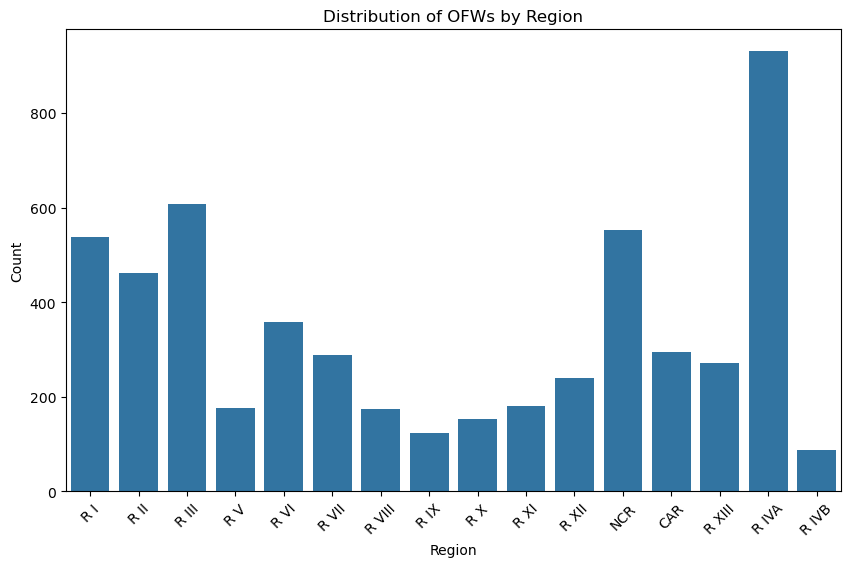

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Region_Name')
plt.title('Distribution of OFWs by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


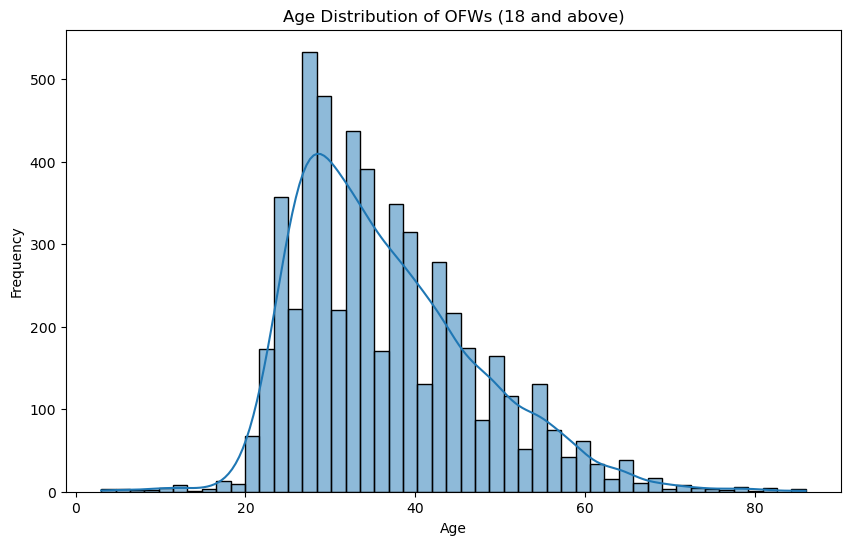

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='RQ4_AGE', kde=True)
plt.title('Age Distribution of OFWs (18 and above)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram for "Age Distribution of OFWs" shows a slightly right-skewed distribution, meaning there are fewer older OFWs compared to younger ones. Most OFWs are concentrated between 20 to 45 years old. Needs cleaning so it only considers 18 and above.

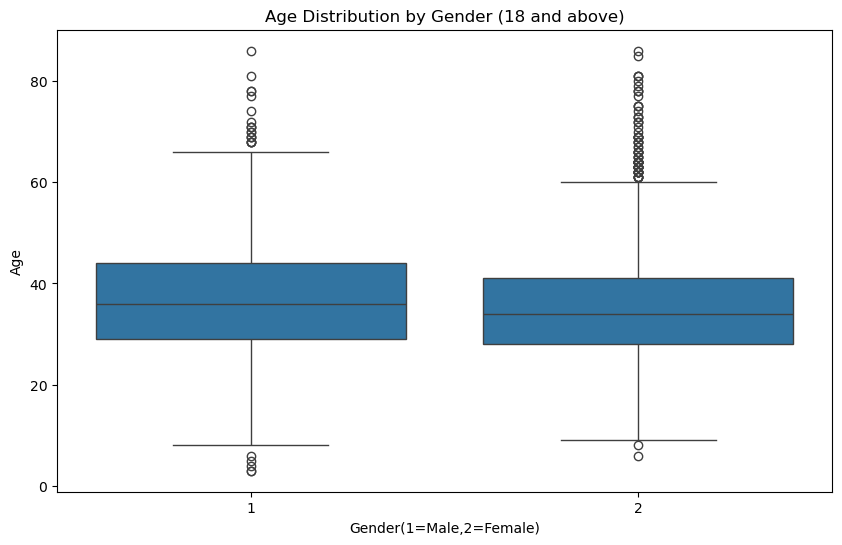

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RQ3_SEX', y='RQ4_AGE', data=data)
plt.title('Age Distribution by Gender (18 and above)')
plt.xlabel('Gender(1=Male,2=Female)')
plt.ylabel('Age')
plt.show()

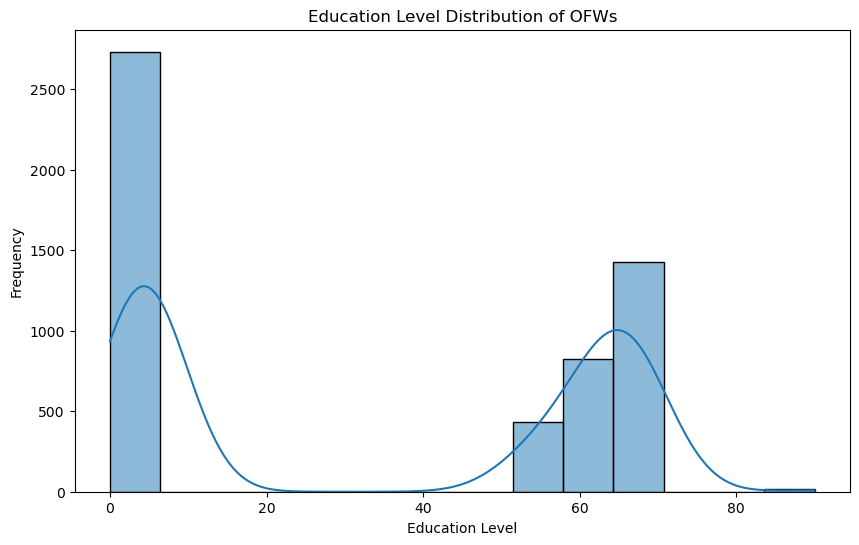

In [46]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='RQ8_HGRADE', kde=True)
plt.title('Education Level Distribution of OFWs')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

#### Q2: What are the most common countries OFWs work in and how long do they stay in these countries?

In [14]:
unique_rq12_ctry = data['RQ12_CTRY'].unique()
unique_rq12_ctry

array([500, 213, 233, 234, 214, 221, 222, 211, 400, 235, 231, 212, 232,
       300, 223, 100, 600], dtype=int64)

In [47]:
country_mapping = {
    233: "Saudi Arabia",
    234: "United Arab Emirates",
    500: "North and South America",
    400: "Europe",
    211: "Hongkong",
    222: "Singapore",
    231: "Kuwait",
    232: "Qatar",
    235: "Other Ctrys in Western Asia",
    213: "Taiwan",
    212: "Japan",
    221: "Malaysia",
    214: "Other Ctrys in East Asia",
    223: "Other Ctrys in SE & SC Asia",
    300: "Australia",
    100: "Africa",
    600: "Other Ctrys"
}

data['Country_Name'] = data['RQ12_CTRY'].map(country_mapping)

In [48]:
country_counts = data['Country_Name'].value_counts()
print(country_counts)

Country_Name
Saudi Arabia                   1238
United Arab Emirates            755
North and South America         434
Europe                          406
Hongkong                        367
Singapore                       357
Kuwait                          294
Qatar                           271
Other Ctrys in Western Asia     252
Taiwan                          215
Japan                           213
Malaysia                        184
Other Ctrys in East Asia        154
Other Ctrys in SE & SC Asia     123
Australia                       107
Africa                           65
Other Ctrys                       5
Name: count, dtype: int64


In [49]:
stay_stats = data.groupby('Country_Name')['RQ16_NOMONTH'].describe()
print(stay_stats)

                              count       mean        std  min    25%   50%  \
Country_Name                                                                  
Africa                         65.0  29.046154  15.207349  0.0  19.00  28.0   
Australia                      86.0  30.127907  16.123637  1.0  16.00  29.5   
Europe                        367.0  30.828338  16.709523  0.0  17.00  31.0   
Hongkong                      333.0  30.102102  17.653332  0.0  15.00  29.0   
Japan                         175.0  27.297143  17.802323  0.0  11.50  28.0   
Kuwait                        294.0  25.210884  15.993698  0.0  12.00  24.0   
Malaysia                      178.0  24.005618  16.088209  0.0  10.00  24.0   
North and South America       349.0  31.383954  17.406610  0.0  18.00  31.0   
Other Ctrys                     5.0  21.800000  18.753666  1.0   7.00  23.0   
Other Ctrys in East Asia      138.0  25.304348  15.878466  0.0  11.25  25.0   
Other Ctrys in SE & SC Asia   100.0  27.500000  17.0

The average number of months worked falls between 25 and 31 months. The data suggests that many OFWs spend approximately 2 to 2.5 years working abroad over a 5-year period (2011-2015).

In many countries, the maximum work duration is 60 months, indicating that some OFWs worked continuously for the entire 5-year period without interruption.

Countries like Japan and Kuwait show lower average months worked compared to regions like Europe and North/South America.

Countries like Saudi Arabia and UAE have large OFW populations and similar work durations (around 26-30 months on average), which shows longer employment in these countries. For countries such as Malaysia and Taiwan, the average number of months worked is lower (around 24 months), which could suggest shorter employment.

##### Visualization

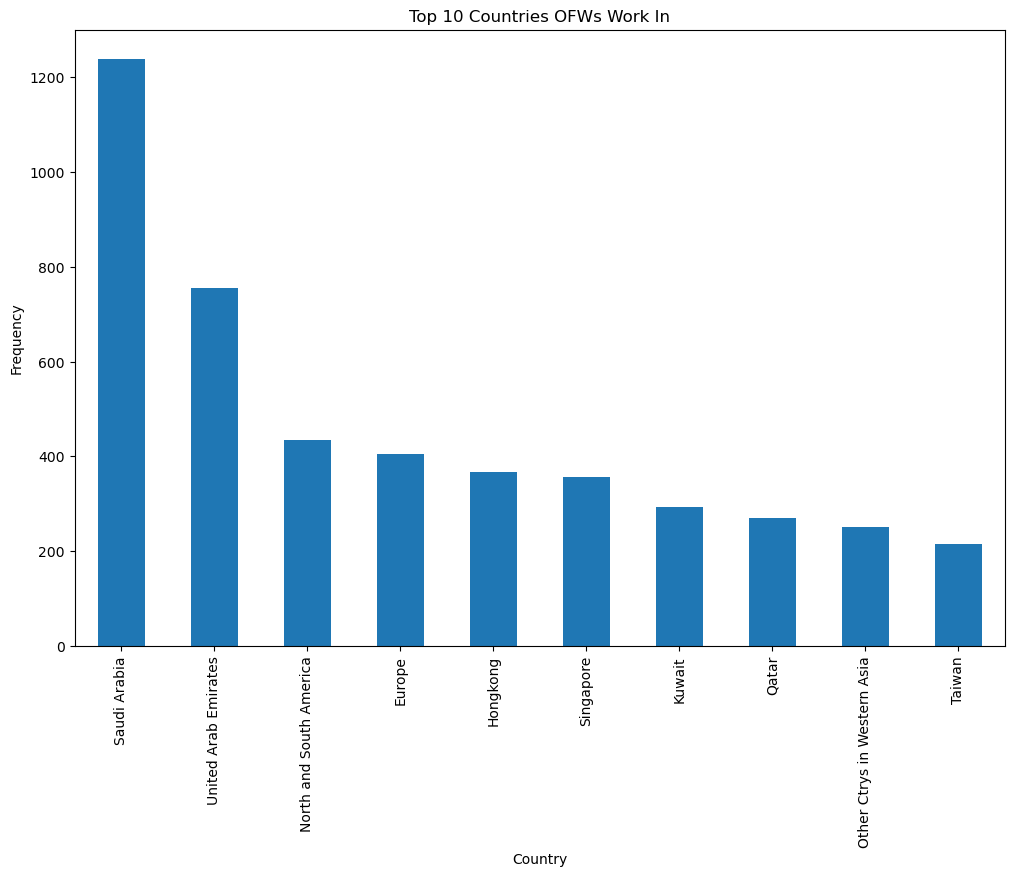

In [18]:
country_counts.index = country_counts.index.map(country_mapping)
plt.figure(figsize=(12,8))
country_counts[:10].plot(kind='bar')
plt.title('Top 10 Countries OFWs Work In')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

We used the bar graph to visualize the concentration of OFWs. For simplicity, we only observe the top 10 countries.

#### Q3: What drives OFWs to work or live abroad?

In [20]:
reason_mapping = {
    1: "Contract Worker",
    2: "Non-Contract Workers",
    3: "Work with Phil. Embassy/Consulate abroad",
    4: "Tourist",
    5: "Student",
    6: "Immigrant",
    7: "Official Mission",
    8: "Others"
}

data['Reason_for_leaving'] = data['RQ10_REASON'].map(reason_mapping)

In [21]:
data['Reason_for_leaving'].describe()

count                5440
unique                  8
top       Contract Worker
freq                 4859
Name: Reason_for_leaving, dtype: object

In [22]:
reason_counts = data['Reason_for_leaving'].value_counts()
print(reason_counts)

Reason_for_leaving
Contract Worker                             4859
Tourist                                      286
Non-Contract Workers                         153
Immigrant                                     74
Others                                        37
Student                                       27
Official Mission                               3
Work with Phil. Embassy/Consulate abroad       1
Name: count, dtype: int64


##### Visualization

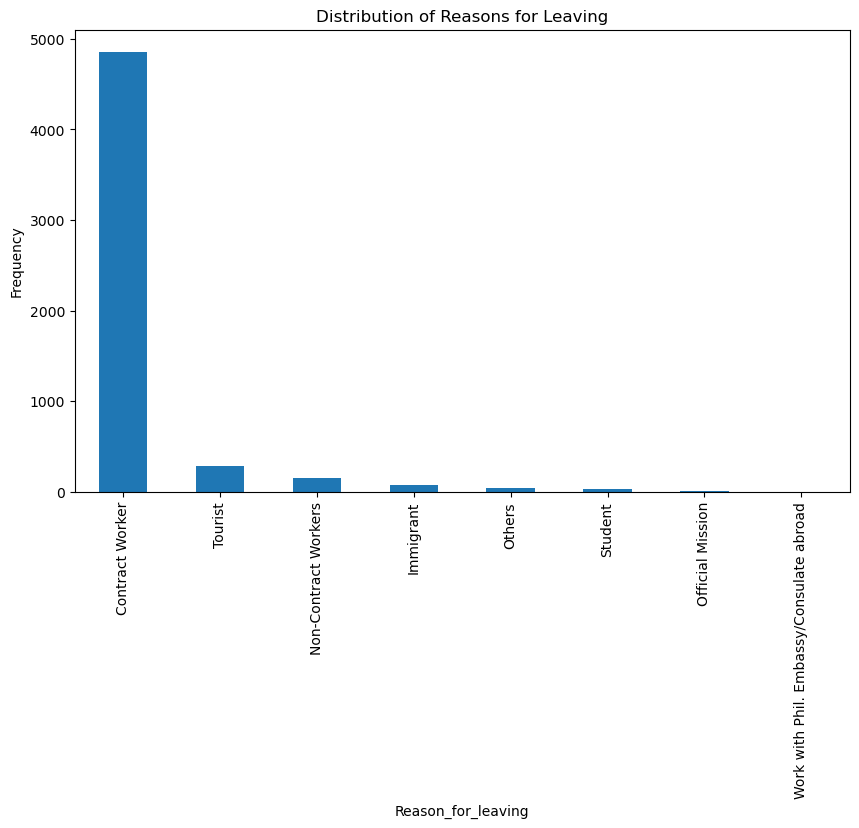

In [23]:
plt.figure(figsize=(10, 6))
reason_counts.plot(kind='bar')
plt.title('Distribution of Reasons for Leaving')
plt.ylabel('Frequency')
plt.show()

We used a bar graph for easy comparison of the frequency of each reason for leaving the country. This suggests the dataset focuses primarily on Overseas Filipino Workers (OFWs).

#### Q4: What are the most common types of jobs that OFWs do abroad

In [24]:
occupation_category_mapping = {
    # Officials, Managers, and Supervisors
    110: "Officials and Managers", 120: "Officials and Managers", 130: "Officials and Managers", 
    141: "Officials and Managers", 144: "Officials and Managers", 210: "Officials and Managers", 
    221: "Officials and Managers", 229: "Officials and Managers", 231: "Officials and Managers", 
    237: "Officials and Managers", 239: "Officials and Managers", 311: "Officials and Managers", 
    319: "Officials and Managers", 411: "Officials and Managers", 412: "Officials and Managers", 
    421: "Officials and Managers", 425: "Officials and Managers", 429: "Officials and Managers", 
    430: "Officials and Managers", 441: "Officials and Managers", 442: "Officials and Managers", 
    449: "Officials and Managers", 490: "Officials and Managers",

    # Professionals
    111: "Professionals", 114: "Professionals", 121: "Professionals", 122: "Professionals", 
    131: "Professionals", 132: "Professionals", 139: "Professionals", 141: "Professionals", 
    142: "Professionals", 151: "Professionals", 159: "Professionals", 211: "Professionals", 
    214: "Professionals", 221: "Professionals", 229: "Professionals", 231: "Professionals", 
    232: "Professionals", 310: "Professionals", 320: "Professionals", 331: "Professionals", 
    333: "Professionals", 341: "Professionals", 342: "Professionals", 351: "Professionals", 
    353: "Professionals", 391: "Professionals", 399: "Professionals", 411: "Professionals", 
    412: "Professionals", 419: "Professionals", 421: "Professionals", 423: "Professionals", 
    430: "Professionals", 441: "Professionals", 446: "Professionals", 449: "Professionals", 
    451: "Professionals", 455: "Professionals", 459: "Professionals", 460: "Professionals",

    # Technicians and Associate Professionals
    119: "Technicians and Associate Professionals", 123: "Technicians and Associate Professionals", 
    133: "Technicians and Associate Professionals", 145: "Technicians and Associate Professionals", 
    152: "Technicians and Associate Professionals", 212: "Technicians and Associate Professionals", 
    219: "Technicians and Associate Professionals", 224: "Technicians and Associate Professionals", 
    242: "Technicians and Associate Professionals", 419: "Technicians and Associate Professionals", 
    431: "Technicians and Associate Professionals", 439: "Technicians and Associate Professionals", 
    444: "Technicians and Associate Professionals", 450: "Technicians and Associate Professionals", 
    471: "Technicians and Associate Professionals", 475: "Technicians and Associate Professionals", 
    480: "Technicians and Associate Professionals",

    # Clerks
    115: "Clerks", 122: "Clerks", 133: "Clerks", 144: "Clerks", 190: "Clerks", 215: "Clerks", 
    223: "Clerks",

    # Service Workers and Shop and Market Sales Workers
    113: "Service Workers and Sales Workers", 123: "Service Workers and Sales Workers", 
    133: "Service Workers and Sales Workers", 139: "Service Workers and Sales Workers", 
    142: "Service Workers and Sales Workers", 153: "Service Workers and Sales Workers", 
    163: "Service Workers and Sales Workers", 230: "Service Workers and Sales Workers", 

    # Farmers, Forestry Workers, and Fishermen
    117: "Farmers, Forestry Workers, and Fishermen", 124: "Farmers, Forestry Workers, and Fishermen", 
    129: "Farmers, Forestry Workers, and Fishermen", 139: "Farmers, Forestry Workers, and Fishermen", 
    212: "Farmers, Forestry Workers, and Fishermen", 222: "Farmers, Forestry Workers, and Fishermen", 
    290: "Farmers, Forestry Workers, and Fishermen", 310: "Farmers, Forestry Workers, and Fishermen", 
    330: "Farmers, Forestry Workers, and Fishermen", 340: "Farmers, Forestry Workers, and Fishermen", 
    490: "Farmers, Forestry Workers, and Fishermen",

    # Trades and Related Workers
    113: "Trades and Related Workers", 123: "Trades and Related Workers", 136: "Trades and Related Workers", 
    142: "Trades and Related Workers", 215: "Trades and Related Workers", 224: "Trades and Related Workers", 
    235: "Trades and Related Workers", 246: "Trades and Related Workers", 333: "Trades and Related Workers", 
    347: "Trades and Related Workers",

    # Plant and Machine Operators and Assemblers
    113: "Plant and Machine Operators", 124: "Plant and Machine Operators", 143: "Plant and Machine Operators", 
    155: "Plant and Machine Operators", 172: "Plant and Machine Operators", 224: "Plant and Machine Operators", 
    240: "Plant and Machine Operators", 259: "Plant and Machine Operators", 269: "Plant and Machine Operators", 
    276: "Plant and Machine Operators", 334: "Plant and Machine Operators",

    # Laborers and Unskilled Workers
    113: "Laborers and Unskilled Workers", 120: "Laborers and Unskilled Workers", 133: "Laborers and Unskilled Workers", 
    162: "Laborers and Unskilled Workers", 214: "Laborers and Unskilled Workers", 313: "Laborers and Unskilled Workers", 
    322: "Laborers and Unskilled Workers",

    # Special Occupations
    113: "Special Occupations", 119: "Special Occupations", 123: "Special Occupations", 910: "Special Occupations", 
    920: "Special Occupations", 930: "Special Occupations", 940: "Special Occupations",
}

data['Occupation_Category'] = data['RQ15_OCCUP1'].map(occupation_category_mapping)


Occupation_Abroad_Category
Clerks                                      263
Trades and Related Workers                  165
Professionals                               153
Laborers and Unskilled Workers               50
Officials and Managers                       46
Plant and Machine Operators                  46
Farmers, Forestry Workers, and Fishermen     44
Technicians and Associate Professionals      43
Special Occupations                          24
Name: count, dtype: int64


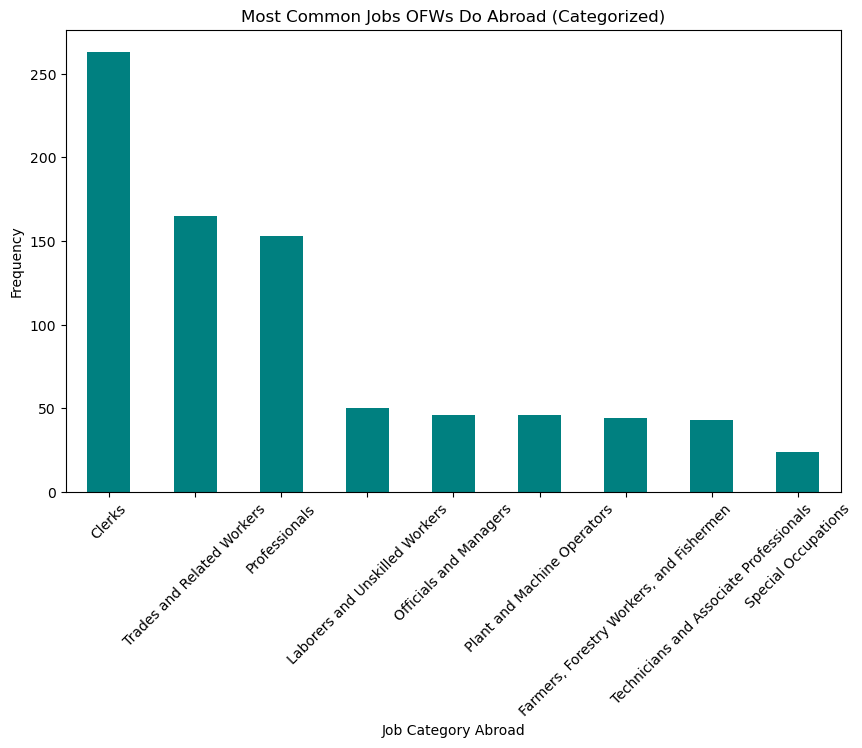

In [60]:

data['Occupation_Abroad_Category'] = data['RQ15_OCCUP1'].map(occupation_category_mapping)

abroad_job_counts = data['Occupation_Abroad_Category'].value_counts()
print(abroad_job_counts)

plt.figure(figsize=(10, 6))
abroad_job_counts.plot(kind='bar', color='teal')
plt.title('Most Common Jobs OFWs Do Abroad (Categorized)')
plt.xlabel('Job Category Abroad')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


We used a bar graph to show the distribution of various occupations of OFWs. The most frequent occupation are clerks with 263 individuals, making up the largest group in this category. Special Occupations, The smallest category, with only 24 individuals. This trend might indicate that clerical jobs are easier to obtain or that many people in clerical roles are migrating for work abroad.

#### Q5: What is the distribution of cash remittances? How much do OFWs typically send home?

In [26]:

cash_remittance_stats = data['RQ22_CASHAMT'].describe()

cash_remittance_skewness = data['RQ22_CASHAMT'].skew()
cash_remittance_mode = data['RQ22_CASHAMT'].mode()[0]

print("Descriptive Statistics:")
print(cash_remittance_stats)
print(f"Skewness: {cash_remittance_skewness}")
print(f"Mode: {cash_remittance_mode}")


Descriptive Statistics:
count      4003.000000
mean      63923.842618
std       67404.802457
min        1300.000000
25%       28000.000000
50%       47000.000000
75%       77500.000000
max      966000.000000
Name: RQ22_CASHAMT, dtype: float64
Skewness: 4.288437598306928
Mode: 60000.0


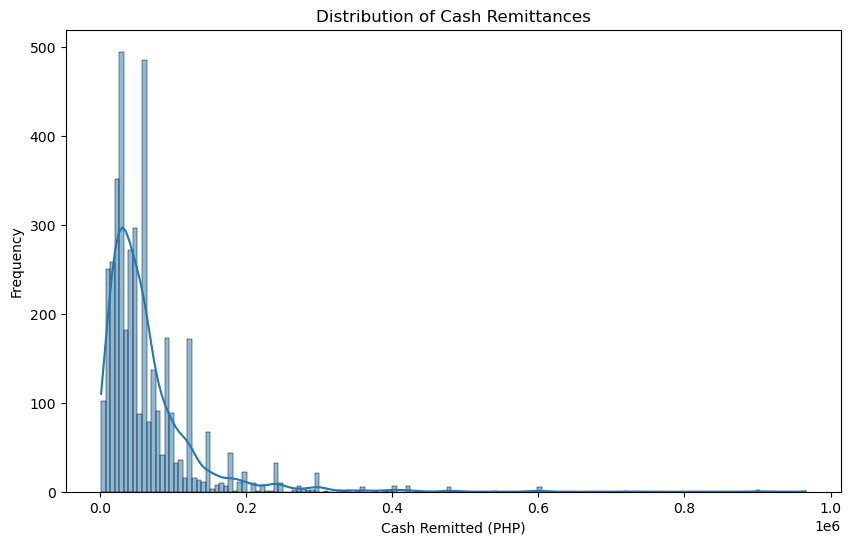

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['RQ22_CASHAMT'], kde=True)
plt.title('Distribution of Cash Remittances')
plt.xlabel('Cash Remitted (PHP)')
plt.ylabel('Frequency')
plt.show()


We used a histogram to shows the distribution of cash remittances and is exhibiting a positive skew. The skewness of the distribution is 4.29, which indicates that most remittances are concentrated in the lower range (below 100,000 units), with a few very large remittances (up to 966,000 units).
The majority of remittances fall below the mean value of 63,923.84 units, reflecting the skewness.
We can observe that the histogram confirms that a small number of OFWs are sending significantly higher amounts of money compared to the others.

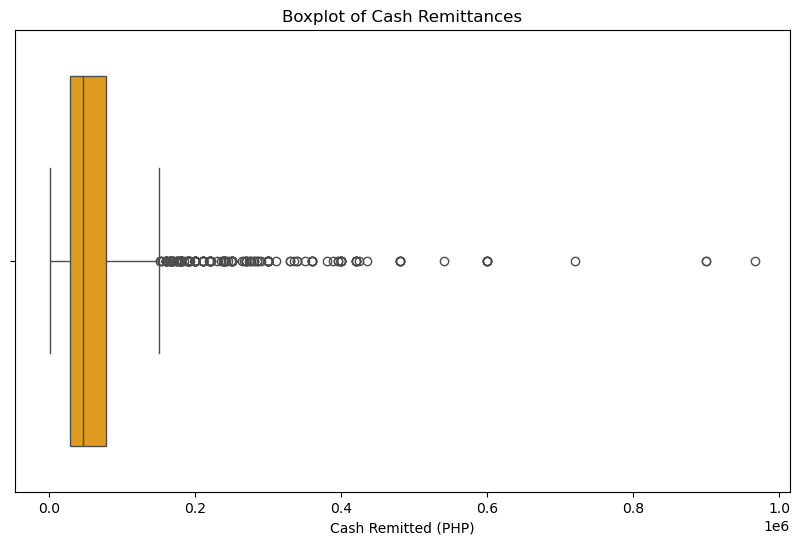

In [28]:
# Boxplot for cash remittances
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['RQ22_CASHAMT'], color='orange')
plt.title('Boxplot of Cash Remittances')
plt.xlabel('Cash Remitted (PHP)')
plt.show()


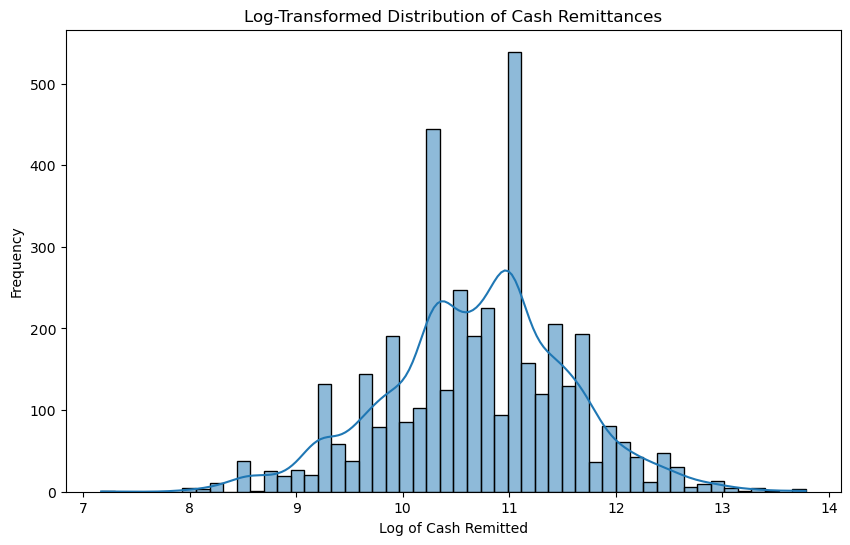

In [29]:
# Apply log transformation to cash remittances
data['Log_CashRemittances'] = np.log1p(data['RQ22_CASHAMT'])  # log1p to handle zero values

# Visualize the transformed distribution with histogram and KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_CashRemittances'], kde=True)
plt.title('Log-Transformed Distribution of Cash Remittances')
plt.xlabel('Log of Cash Remitted')
plt.ylabel('Frequency')
plt.show()

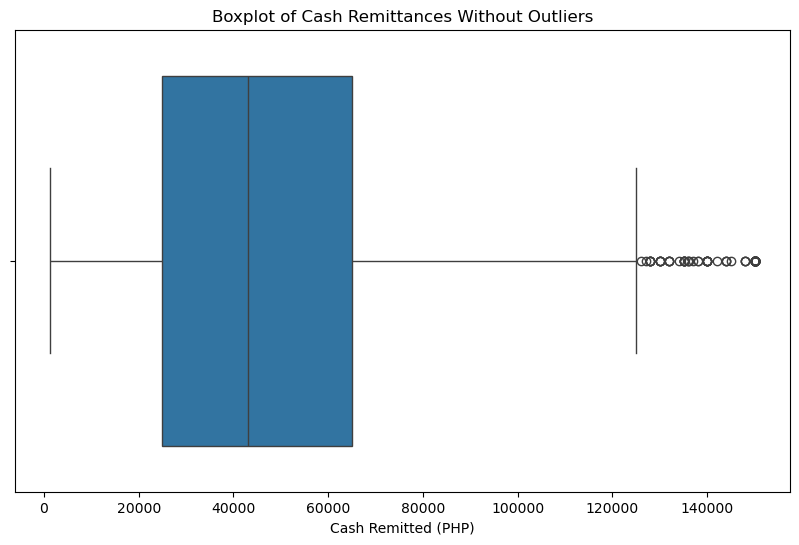

In [30]:
# Calculate IQR
Q1 = data['RQ22_CASHAMT'].quantile(0.25)
Q3 = data['RQ22_CASHAMT'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = data[(data['RQ22_CASHAMT'] >= lower_bound) & (data['RQ22_CASHAMT'] <= upper_bound)]

# Boxplot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['RQ22_CASHAMT'])
plt.title('Boxplot of Cash Remittances Without Outliers')
plt.xlabel('Cash Remitted (PHP)')
plt.show()


####  Q6: OFWs in certain countries remit more money compared to those in other countries.

In [33]:
# Apply the country mapping to the RQ12_CTRY column
data['Country_Name'] = data['RQ12_CTRY'].map(mapping)

# Check the first few rows to ensure the mapping worked
print(data[['RQ12_CTRY', 'Country_Name']].head())


   RQ12_CTRY              Country_Name
0        500   North and South America
1        213                    Taiwan
2        233              Saudi Arabia
3        234      United Arab Emirates
4        214  Other Ctrys in East Asia


                             count           mean            std     min  \
Country_Name                                                               
Africa                        44.0  101068.181818   86659.826192  6000.0   
Australia                     62.0   95250.000000  104646.193527  6000.0   
Europe                       297.0   91677.676768   79576.668303  5000.0   
Hongkong                     285.0   44661.403509   33699.588090  4000.0   
Japan                        123.0   88169.235772  113403.219048  8000.0   
Kuwait                       237.0   41573.839662   30273.428930  4000.0   
Malaysia                     130.0   36666.538462   32147.237207  4000.0   
North and South America      278.0   97122.805755  103713.533594  3000.0   
Other Ctrys                    3.0   30000.000000   20880.613018  6000.0   
Other Ctrys in East Asia     107.0   85523.364486   75003.848429  5000.0   
Other Ctrys in SE & SC Asia   74.0   63258.108108   59249.830950  5000.0   
Other Ctrys 

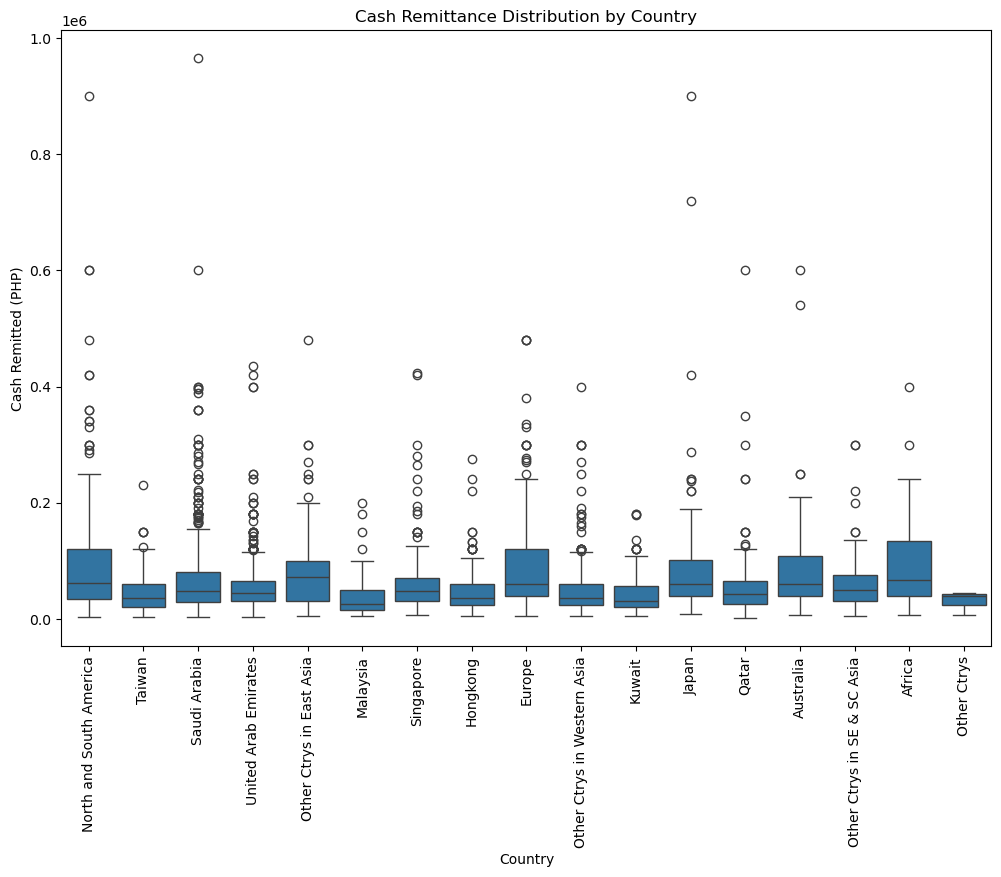

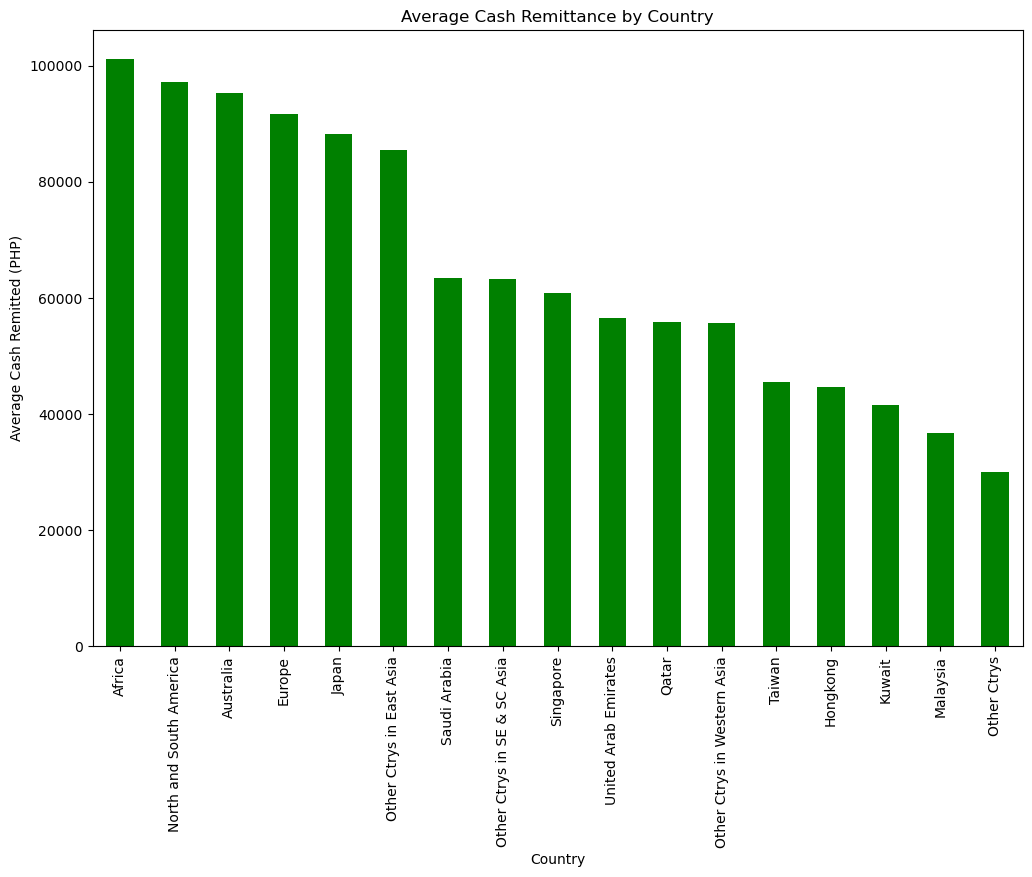

In [34]:
# Group by the new 'Country_Name' column and calculate summary statistics for remittances
remittance_by_country = data.groupby('Country_Name')['RQ22_CASHAMT'].describe()

# Print the summary statistics
print(remittance_by_country)

# Boxplot to compare remittances across different countries
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country_Name', y='RQ22_CASHAMT', data=data)
plt.title('Cash Remittance Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()

# Bar chart to show average cash remittances by country
avg_remittance_by_country = data.groupby('Country_Name')['RQ22_CASHAMT'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
avg_remittance_by_country.plot(kind='bar', color='green')
plt.title('Average Cash Remittance by Country')
plt.xlabel('Country')
plt.ylabel('Average Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()


In [35]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) and IQR
Q1 = data['RQ22_CASHAMT'].quantile(0.25)
Q3 = data['RQ22_CASHAMT'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = data[(data['RQ22_CASHAMT'] < lower_bound) | (data['RQ22_CASHAMT'] > upper_bound)]

# Print the number of outliers detected
print(f"Number of outliers detected: {outliers.shape[0]}")

# Show the outlier rows
outliers.head()


Number of outliers detected: 248


,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND,Region_Name,Reason_for_leaving,Occupation_Category,Occupation_Abroad_Category,Log_CashRemittances,Log_Cash_Remittances,Country_Name
107,1,96,3,21127,214,28,81,2,1,52,5,7,2015,2.0,55,23,6,NaN,500,11,1,723.0,55.0,2,NaN,NaN,NaN,6.0,2016.0,1,161000.0,5.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,40000.0,2,NaN,485.5569,NaN,R I,Immigrant,NaN,NaN,11.989166,11.989166,North and South America
109,1,97,3,21127,214,28,81,2,1,69,4,2,2015,2.0,6,23,6,NaN,500,11,1,913.0,55.0,2,NaN,NaN,NaN,1.0,2016.0,1,210000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,485.5569,NaN,R I,Immigrant,NaN,NaN,12.254868,12.254868,North and South America
143,1,125,2,21321,314,26,6,2,2,43,4,10,2014,2.0,4,21,1,1.0,400,14,1,913.0,55.0,2,NaN,NaN,NaN,12.0,2015.0,1,180000.0,1.0,1.0,90.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,6500.0,478.2327,1.0,R I,Contract Worker,NaN,NaN,12.100718,12.100718,Europe
166,1,143,1,23224,424,26,1,1,1,38,3,11,2014,2.0,4,921,1,2.0,233,12,1,713.0,35.0,2,NaN,NaN,NaN,11.0,2015.0,1,174000.0,5.0,1.0,50.0,NaN,NaN,3.0,50.0,NaN,NaN,NaN,NaN,2,NaN,2,NaN,695.6909,1.0,R I,Contract Worker,NaN,NaN,12.066816,12.066816,Saudi Arabia
194,1,170,3,22203,444,28,3,3,1,30,4,9,2014,2.0,68,921,1,2.0,400,10,1,314.0,40.0,1,8.0,2015.0,2.0,NaN,NaN,1,200000.0,1.0,1.0,40.0,NaN,NaN,3.0,60.0,NaN,NaN,NaN,NaN,1,500000.0,2,NaN,512.6429,1.0,R I,Contract Worker,NaN,NaN,12.206078,12.206078,Europe


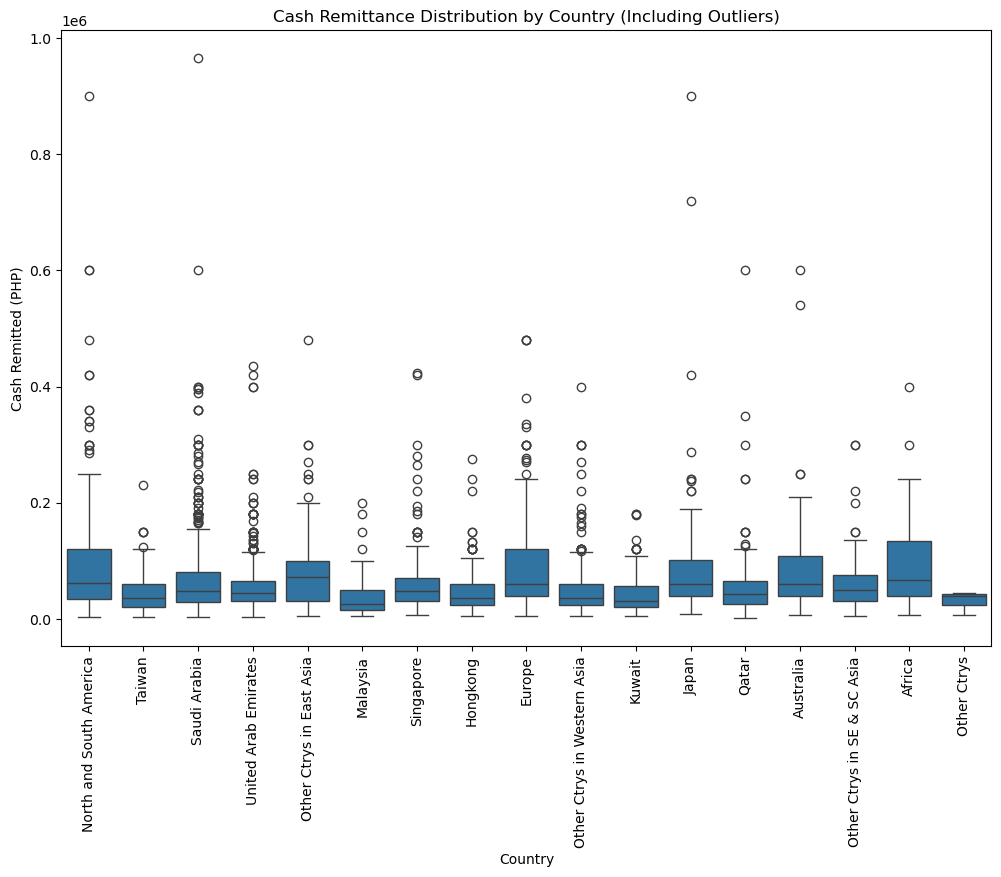

In [36]:
# Boxplot to visualize cash remittances with outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country_Name', y='RQ22_CASHAMT', data=data)
plt.title('Cash Remittance Distribution by Country (Including Outliers)')
plt.xlabel('Country')
plt.ylabel('Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()


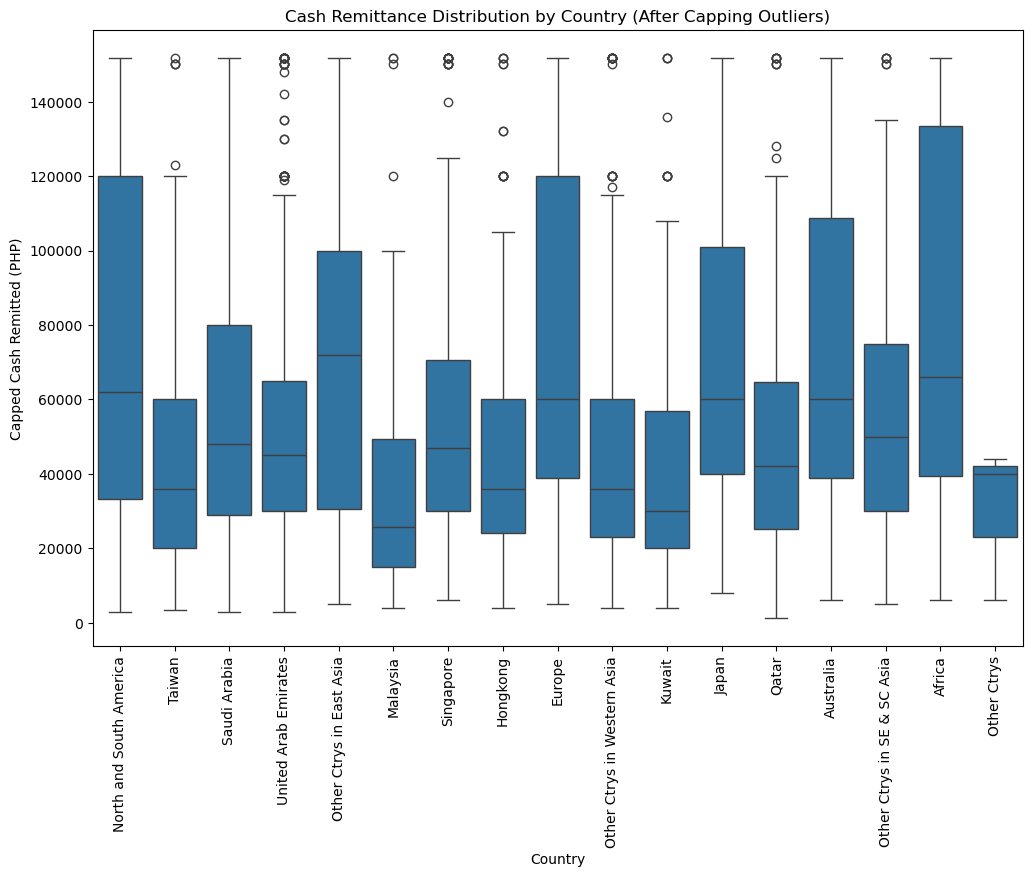

In [37]:
# Cap the values of cash remittances at the upper and lower bounds
data['Capped_CashRemittances'] = data['RQ22_CASHAMT'].clip(lower_bound, upper_bound)

# Boxplot after capping
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country_Name', y='Capped_CashRemittances', data=data)
plt.title('Cash Remittance Distribution by Country (After Capping Outliers)')
plt.xlabel('Country')
plt.ylabel('Capped Cash Remitted (PHP)')
plt.xticks(rotation=90)
plt.show()


#data.drop(['col name], axis = 1)



In [38]:
data.isna().sum()

RREG                             0
HHNUM                            0
RRPL                             0
RSTR                             0
RPSU                             0
RROTATION                        0
RQ1_LNO                          0
RQ2_REL                          0
RQ3_SEX                          0
RQ4_AGE                          0
RQ5_TMSLEFT                      0
RQ6M_DTLEFT                      0
RQ6Y_DTLEFT                      0
RQ7_MSTAT                        2
RQ8_HGRADE                       0
RQ9_USOCC                        0
RQ10_REASON                      0
RQ11_BASE                      428
RQ12_CTRY                        0
RQ13_STAY                        0
RQ14_INDWORK                     0
RQ15_OCCUP1                    373
RQ16_NOMONTH                   373
RQ17_RET                         0
RQ18M_DTRET                   4181
RQ18Y_DTRET                   4181
RQ19_REASON                   4181
RQ20M_DTEXP                   1259
RQ20Y_DTEXP         

#START THE FEATURE UNDERSTANDING

In [39]:
data

,RREG,HHNUM,RRPL,RSTR,RPSU,RROTATION,RQ1_LNO,RQ2_REL,RQ3_SEX,RQ4_AGE,RQ5_TMSLEFT,RQ6M_DTLEFT,RQ6Y_DTLEFT,RQ7_MSTAT,RQ8_HGRADE,RQ9_USOCC,RQ10_REASON,RQ11_BASE,RQ12_CTRY,RQ13_STAY,RQ14_INDWORK,RQ15_OCCUP1,RQ16_NOMONTH,RQ17_RET,RQ18M_DTRET,RQ18Y_DTRET,RQ19_REASON,RQ20M_DTEXP,RQ20Y_DTEXP,RQ21_CASHREM,RQ22_CASHAMT,RQ23_MODE,RQ241C_CONSUM,RQ241P_CONSUM,RQ242C_INVEST,RQ242P_INVEST,RQ243C_SAVINGS,RQ243P_SAVINGS,RQ244C_GIFT,RQ244P_GIFT,RQ245C_OTHERS,RQ245P_OTHERS,RQ25_RET6MOS,RQ26_CASHHOME,RQ27_INKIND,RQ28_KINDAMT,RSWGT,RP6M_IND,Region_Name,Reason_for_leaving,Occupation_Category,Occupation_Abroad_Category,Log_CashRemittances,Log_Cash_Remittances,Country_Name,Capped_CashRemittances
0,1,1,1,21125,10,26,81,8,2,59,3,1,2015,3.0,4,131,6,NaN,500,18,1,513.0,24.0,2,NaN,NaN,NaN,7.0,2016.0,1,60000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,7500.0,483.3481,NaN,R I,Immigrant,NaN,NaN,11.002117,11.002117,North and South America,60000.0
1,1,2,1,21125,10,26,3,3,1,29,1,7,2012,1.0,67,223,1,1.0,213,36,1,222.0,36.0,1,7.0,2015.0,2.0,NaN,NaN,1,15000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50000.0,1,8000.0,512.6429,1.0,R I,Contract Worker,"Farmers, Forestry Workers, and Fishermen","Farmers, Forestry Workers, and Fishermen",9.615872,9.615872,Taiwan,15000.0
2,1,2,1,21125,10,26,4,3,2,25,1,4,2012,2.0,67,223,1,1.0,233,24,1,223.0,24.0,1,4.0,2014.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,60000.0,2,NaN,539.1801,2.0,R I,Contract Worker,Clerks,Clerks,NaN,NaN,Saudi Arabia,NaN
3,1,2,1,21125,10,26,10,3,1,30,4,1,2015,1.0,68,512,1,1.0,234,12,1,512.0,40.0,2,NaN,NaN,NaN,1.0,2016.0,1,48000.0,1.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,1,8000.0,512.6429,1.0,R I,Contract Worker,NaN,NaN,10.778977,10.778977,United Arab Emirates,48000.0
4,1,3,1,21125,10,26,2,3,1,35,2,2,2011,2.0,4,721,2,1.0,214,36,1,826.0,45.0,1,12.0,2013.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,477.4089,2.0,R I,Non-Contract Workers,NaN,NaN,NaN,NaN,Other Ctrys in East Asia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5435,42,4575,1,21204,6194,26,6,3,1,27,1,2,2013,1.0,64,23,1,1.0,213,36,1,312.0,31.0,2,NaN,NaN,NaN,2.0,2016.0,1,50000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,5.0,95.0,2,NaN,1,15000.0,812.9461,1.0,R IVB,Contract Worker,NaN,NaN,10.819798,10.819798,Taiwan,50000.0
5436,42,4576,4,21112,6211,28,2,2,2,26,1,1,2012,2.0,4,21,1,1.0,234,36,1,421.0,36.0,1,1.0,2015.0,2.0,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,744.4370,2.0,R IVB,Contract Worker,Professionals,Professionals,NaN,NaN,United Arab Emirates,NaN
5437,42,4577,2,21117,6219,26,7,3,1,34,1,10,2013,4.0,6,723,1,1.0,600,36,1,921.0,23.0,2,NaN,NaN,NaN,10.0,2016.0,1,44000.0,5.0,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,815.7081,1.0,R IVB,Contract Worker,NaN,NaN,10.691968,10.691968,Other Ctrys,44000.0
5438,42,4578,2,21117,6219,26,9,3,1,30,4,4,2015,1.0,65,341,1,1.0,233,12,1,724.0,48.0,2,NaN,NaN,NaN,4.0,2016.0,1,25000.0,5.0,1.0,50.0,2.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,815.7081,1.0,R IVB,Contract Worker,NaN,NaN,10.126671,10.126671,Saudi Arabia,25000.0


1. What are the demographic characteristics of the overseas Filipino workers?
2. What are the common reasons for leaving the Philippines, and how do they differ based on the type of occupation abroad?

In [40]:
data['RQ4_AGE'].describe()  # For numerical variable age
data['RQ3_SEX'].value_counts()  # For categorical variable gender


RQ3_SEX
2    2908
1    2532
Name: count, dtype: int64


## Research Question

Come up with one (1) research question to answer using the dataset. Here are some requirements:

- **Important**: The research question should arise from exploratory data analysis. There should be an explanation regarding the connection of the research question to the answers obtained from performing exploratory data analysis.
- The research question should be within the scope of the dataset.
- The research question should be answerable by performing data mining techniques (i.e., rule mining, clustering, collaborative filtering). Students cannot use other techniques that are not covered in class.
- Make sure to indicate the importance and significance of the research question.
